<a href="https://colab.research.google.com/github/Dotto-Luis/CoderHouse-Challenges/blob/main/EntregaFinal_BankMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LIBRARIES

Comenzamos importando librerias

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats
import pylab
import warnings
import seaborn as sns
import missingno as msno
%matplotlib inline

#DATA ACQUISITION

Traemos el dataset al notebook

In [156]:
csv = 'https://raw.githubusercontent.com/Dotto-Luis/Projects/main/Finance/Bank%20Marketing/bank-additional-full2.csv'

#DATA WRANGLING

Vemos que datos componen el dataset

In [157]:
df = pd.read_csv(csv)

In [158]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [159]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [160]:
df.shape

(41188, 21)

In [161]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

En esta etapa debemos eliminar los datos que no brinden información extra como los duplicados, revisar datos faltantes, tomar decisiones sobre qué hacer con los valores missing o los valores nulls (eliminarlos o valorarlos), ver si hay columnas que no aportan información relevante y enlentecen nuestro código, etc. Esta propiedad estandariza el formato de las columnas (float, datatimes, etc).

In [163]:
df.duplicated().sum()

12

Encontramos que hay 12 filas duplicadas. Veamos cuales son:

In [164]:
df[df.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


Veamos si hay nulos

In [165]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

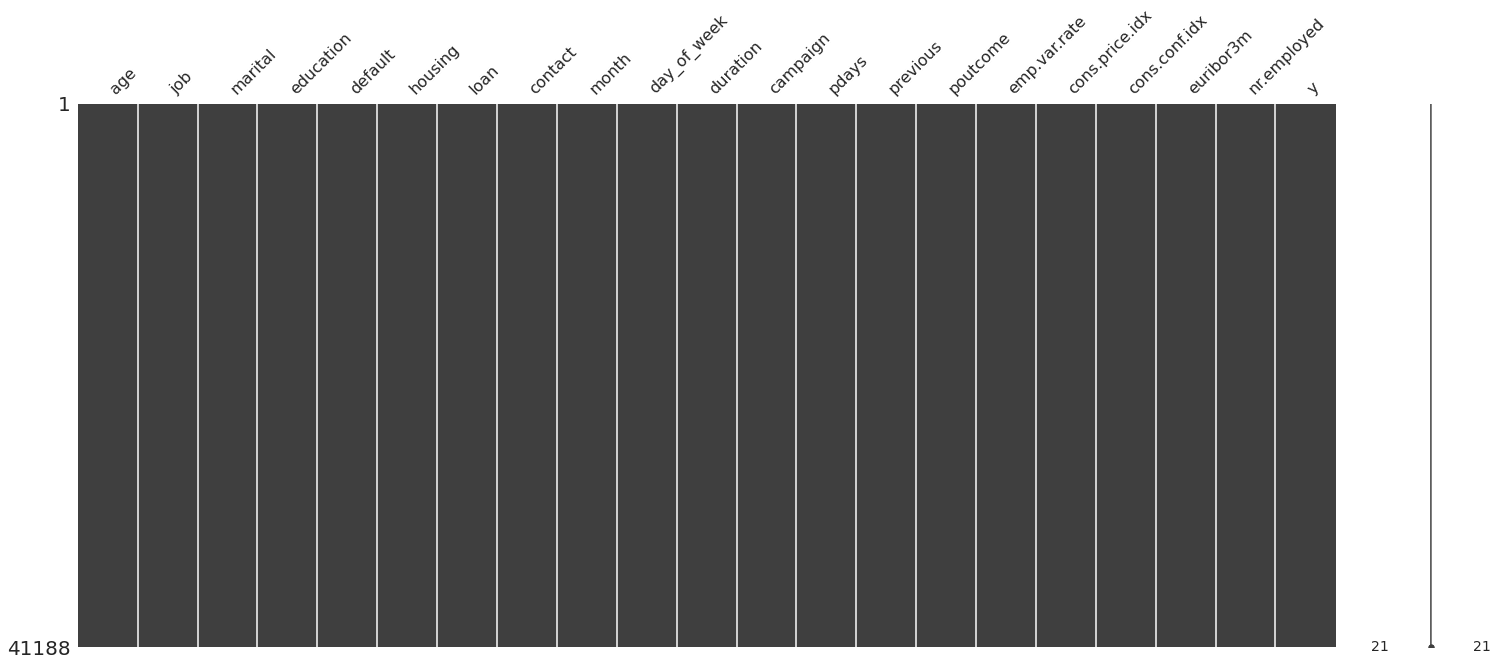

In [166]:
msno.matrix(df)

Como dijimos anteriormente a simple vista pareciera todo bien, pero notamos que hay una variable categorica "unknow" en nuestro dataset.

In [167]:
print('Hay un ' + str((df['job']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna job')
print('Hay un ' + str((df['marital']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna marital')
print('Hay un ' + str((df['education']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna education')
print('Hay un ' + str((df['default']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna default')
print('Hay un ' + str((df['housing']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna housing')
print('Hay un ' + str((df['loan']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna loan')
print('Hay un ' + str((df['contact']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna contact')
print('Hay un ' + str((df['month']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna month')
print('Hay un ' + str((df['day_of_week']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna day_of_week')
print('Hay un ' + str((df['y']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna y')
print('Hay un ' + str((df['poutcome']=='unknown').sum()/41188*100) +' % de registros Unknow en la columna poutcome')

Hay un 0.8012042342429834 % de registros Unknow en la columna job
Hay un 0.1942313295134505 % de registros Unknow en la columna marital
Hay un 4.202680392347285 % de registros Unknow en la columna education
Hay un 20.87258424783918 % de registros Unknow en la columna default
Hay un 2.40361270272895 % de registros Unknow en la columna housing
Hay un 2.40361270272895 % de registros Unknow en la columna loan
Hay un 0.0 % de registros Unknow en la columna contact
Hay un 0.0 % de registros Unknow en la columna month
Hay un 0.0 % de registros Unknow en la columna day_of_week
Hay un 0.0 % de registros Unknow en la columna y
Hay un 0.0 % de registros Unknow en la columna poutcome


Finalmente, no eliminamos las filas que tienen valores "unknow" porque lo tomamos como un valor mas que toma la variable y no como un valor faltante.

Ahora procedemos a la eliminacion de las filas duplicadas

In [168]:
df1 = df.drop_duplicates(subset=None, 
                          keep='first', 
                          inplace=False, 
                          ignore_index=False)

In [169]:
df1.shape

(41176, 21)

**De ahora en mas, df1 sera el dataframe con el que trabajaremos, excepto para los algoritmos.**

#EDA

Nos parecio adecuado separar el dataset en las variables relacionadas con el cliente, las relacionadas con el ultimo contacto de la campania y las relacionadas con el contexto socioeconomico.

##RELACIONADAS CON EL CLIENTE

In [170]:
bank_client = df1.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [171]:
print('Jobs:\n', bank_client['job'].unique())
print('Marital:\n', bank_client['marital'].unique())
print('Education:\n', bank_client['education'].unique())
print('Default:\n', bank_client['default'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Marital:
 ['married' 'single' 'divorced' 'unknown']
Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


###AGE

In [172]:
print('Min age: ', bank_client['age'].min())
print('Max age: ', bank_client['age'].max())
print('Null Values: ', bank_client['age'].isnull().any())

Min age:  17
Max age:  98
Null Values:  False


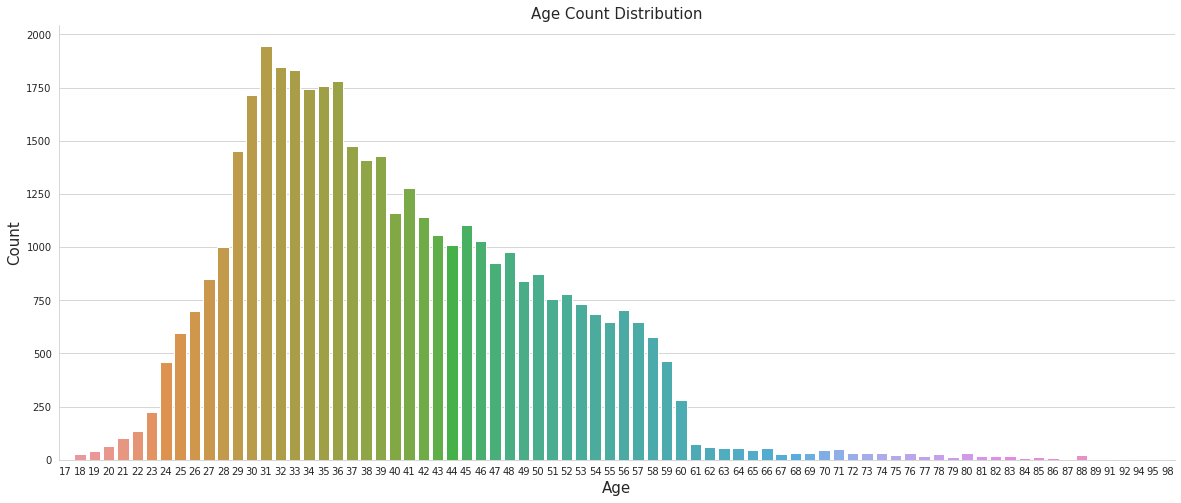

In [173]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


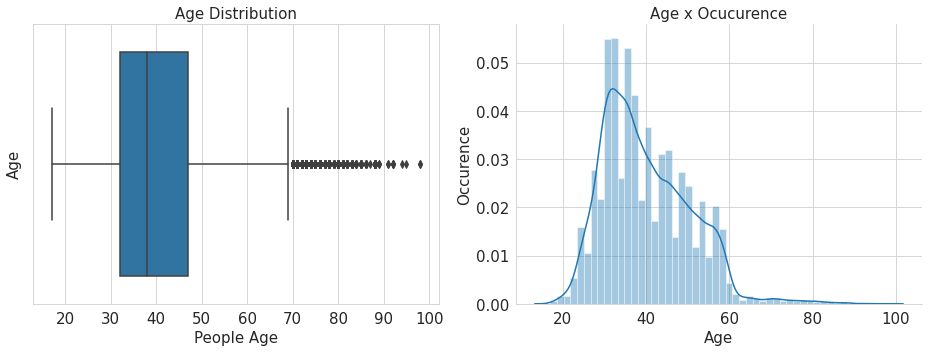

In [174]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = bank_client, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank_client['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [175]:
print('1º Quartile: ', bank_client['age'].quantile(q = 0.25))
print('2º Quartile: ', bank_client['age'].quantile(q = 0.50))
print('3º Quartile: ', bank_client['age'].quantile(q = 0.75))
print('4º Quartile: ', bank_client['age'].quantile(q = 1.00))
#CALCULO DE OUTLIERS
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Las edades por encima de: ', bank_client['age'].quantile(q = 0.75) + 
                      1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'son outliers')

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Las edades por encima de:  69.5 son outliers


In [176]:
print('Cantidad de outliers: ', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Cantidad de clientes: ', len(bank_client))
#Outliers in %
print('Porcentaje de outliers:', round(bank_client[bank_client['age'] > 69.6]['age'].count()*100/len(bank_client),2), '%')

Cantidad de outliers:  468
Cantidad de clientes:  41176
Porcentaje de outliers: 1.14 %


###JOBS

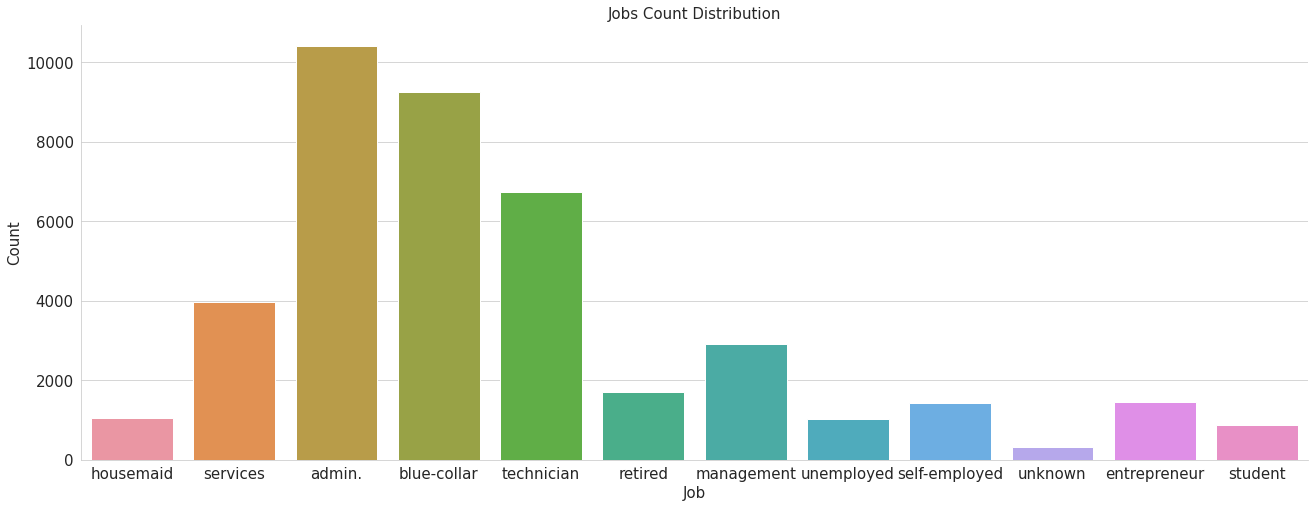

In [177]:
fig, ax = plt.subplots()
fig.set_size_inches(22, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Jobs Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

###MARITAL

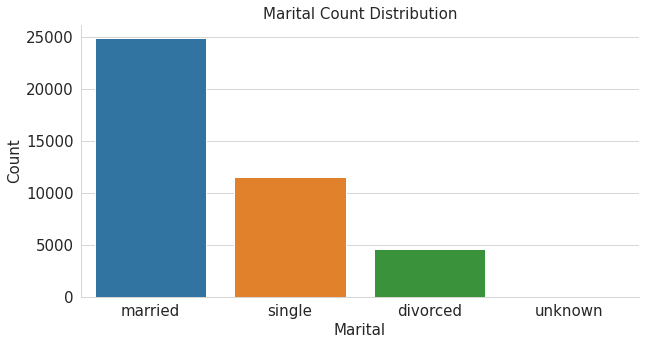

In [178]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

###EDUCATION

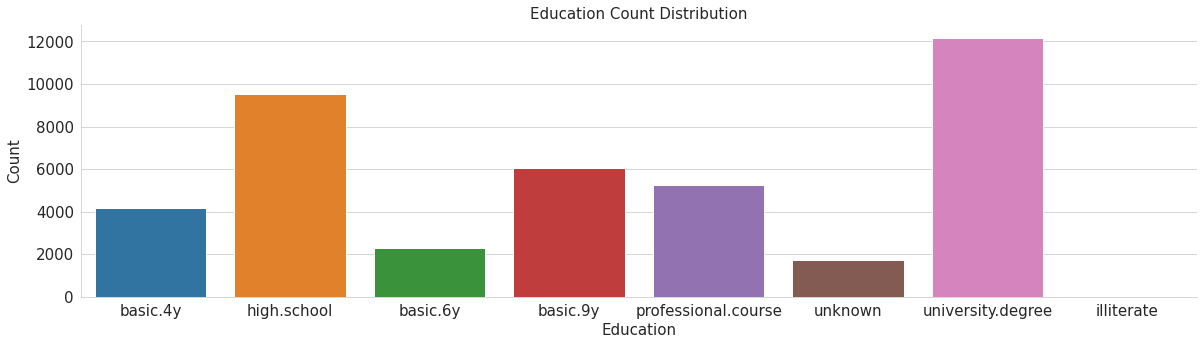

In [179]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

###DEFAULT, HOUSING, LOAN

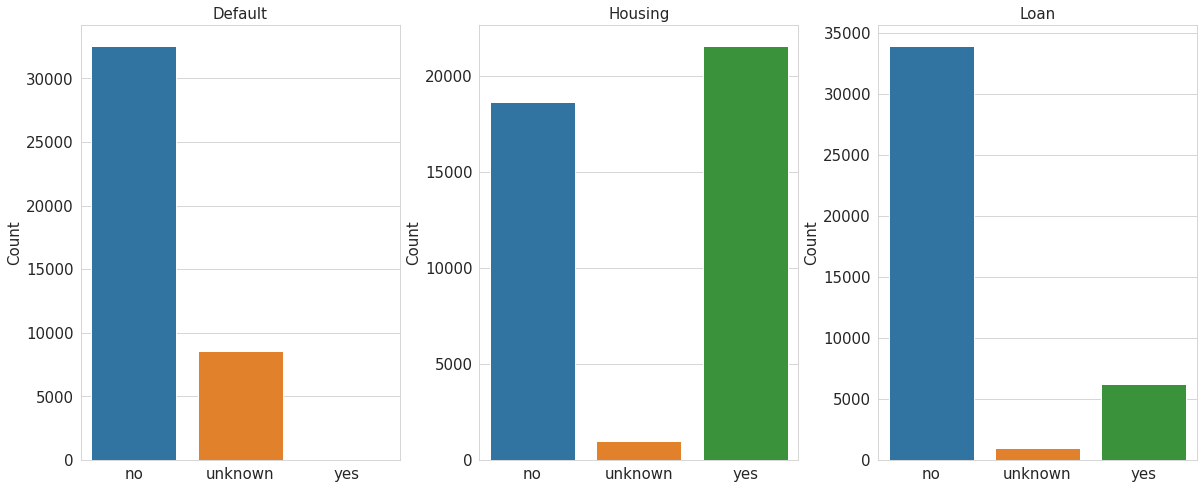

In [180]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [181]:
print('Default:\n No credit in default:'     , bank_client[bank_client['default'] == 'no']     ['age'].count(),
              '\n Unknown credit in default:', bank_client[bank_client['default'] == 'unknown']['age'].count(),
              '\n Yes to credit in default:' , bank_client[bank_client['default'] == 'yes']    ['age'].count())

Default:
 No credit in default: 32577 
 Unknown credit in default: 8596 
 Yes to credit in default: 3


In [182]:
print('Housing:\n No housing in loan:'     , bank_client[bank_client['housing'] == 'no']     ['age'].count(),
              '\n Unknown housing in loan:', bank_client[bank_client['housing'] == 'unknown']['age'].count(),
              '\n Yes to housing in loan:' , bank_client[bank_client['housing'] == 'yes']    ['age'].count())

Housing:
 No housing in loan: 18615 
 Unknown housing in loan: 990 
 Yes to housing in loan: 21571


In [183]:
print('Housing:\n No to personal loan:'     , bank_client[bank_client['loan'] == 'no']     ['age'].count(),
              '\n Unknown to personal loan:', bank_client[bank_client['loan'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , bank_client[bank_client['loan'] == 'yes']    ['age'].count())

Housing:
 No to personal loan: 33938 
 Unknown to personal loan: 990 
 Yes to personal loan: 6248


###TRATAMIENTO DE LAS VARIBLES CATEGORICAS

In [184]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);


In [185]:
bank_client['job'].replace(['housemaid' , 'services' , 'admin.' , 'blue-collar' , 'technician', 'retired' , 'management', 'unemployed', 'self-employed', 'unknown' , 'entrepreneur', 'student'] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)

bank_client['education'].replace(['basic.4y' , 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown' , 'university.degree' , 'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)

bank_client['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace=True)

bank_client['default'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

bank_client['housing'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

bank_client['loan'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

Esta seria otra forma de realizar lo mismo


```
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan'])
```

In [186]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,3,1,1,1,2,2,2
1,3,2,1,2,3,2,2
2,2,2,1,2,2,1,2
3,2,3,1,3,2,2,2
4,3,2,1,2,2,2,1


In [187]:
print(bank_client.shape)
bank_client.head()

(41176, 7)


,age,job,marital,education,default,housing,loan
0,3,1,1,1,2,2,2
1,3,2,1,2,3,2,2
2,2,2,1,2,2,1,2
3,2,3,1,3,2,2,2
4,3,2,1,2,2,2,1


##RELACIONADAS CON EL ULTIMO CONTACTO DE LA CAMPANIA

Trataremos las variables categoricas y agruparemos variables si fuese necesario

In [188]:
bank_related = df1.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [189]:
bank_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [190]:
print("Kind of Contact: \n", bank_related['contact'].unique())
print("\nWhich monthis this campaing work: \n", bank_related['month'].unique())
print("\nWhich days of week this campaing work: \n", bank_related['day_of_week'].unique())

Kind of Contact: 
 ['telephone' 'cellular']

Which monthis this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


###DURATION

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


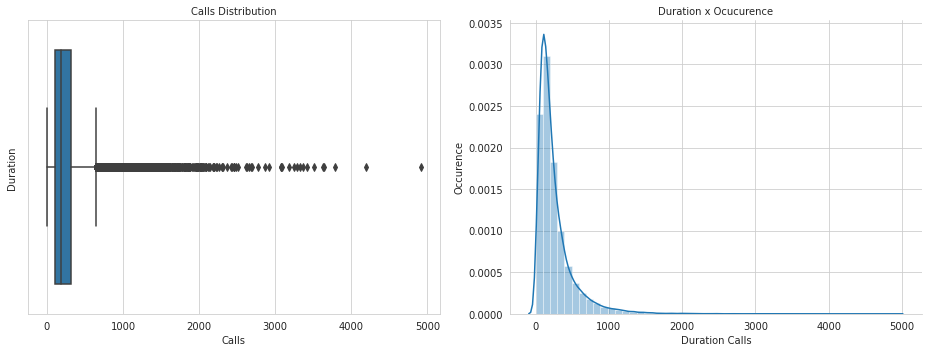

In [191]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = bank_related, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_related['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [192]:
print("Max duration  call in minutes:  ", round((bank_related['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((bank_related['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((bank_related['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((bank_related['duration'].std()/60),1))

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [193]:
print('1º Quartile: ', bank_related['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank_related['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank_related['duration'].quantile(q = 0.75))
print('4º Quartile: ', bank_related['duration'].quantile(q = 1.00))
#CALCULO DE OUTLIERS:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Llamadas con duracion mayor a: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'son outliers')

1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
Llamadas con duracion mayor a:  644.5 son outliers


In [194]:
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_related))
#Outliers in %
print('Outliers are:', round(bank_related[bank_related['duration'] > 644.5]['duration'].count()*100/len(bank_related),2), '%')

Numerber of outliers:  2963
Number of clients:  41176
Outliers are: 7.2 %


Observamos que si las llamadas duraron 0, obviamos que la persona no se suscribio.

In [195]:
df1[(df1['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


Borramos las filas con duracion == 0

In [196]:
df1 = df1.drop(df1[df1['duration']==0].index)
df1.shape

(41172, 21)

###CONTACT, MONTH, DAY OF WEEK

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


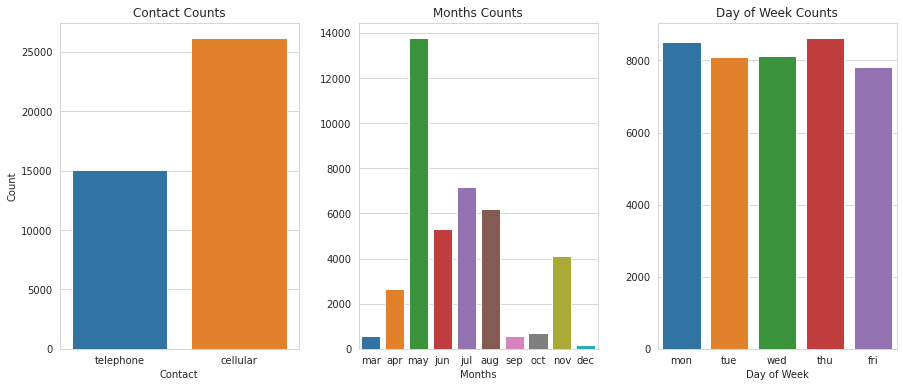

In [197]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(bank_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(bank_related['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

###TRATAMIENTO DE LAS VARIABLES CONTACT, MONTH, DAY OF WEEK

En este caso convertiremos las variables con la forma mencionada anteriormente como alternativa

In [198]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week']) 

In [199]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307


In [200]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);

In [201]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3


##RELACIONADAS CON EL CONTEXTO SOCIAL Y ECONOMICO

In [202]:
bank_se = df1.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


##OTROS ATRIBUTOS

In [203]:
bank_o = df1.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [204]:
bank_o['poutcome'].unique()


array(['nonexistent', 'failure', 'success'], dtype=object)

In [205]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

##OTROS ANALISIS

###BIVARIADO

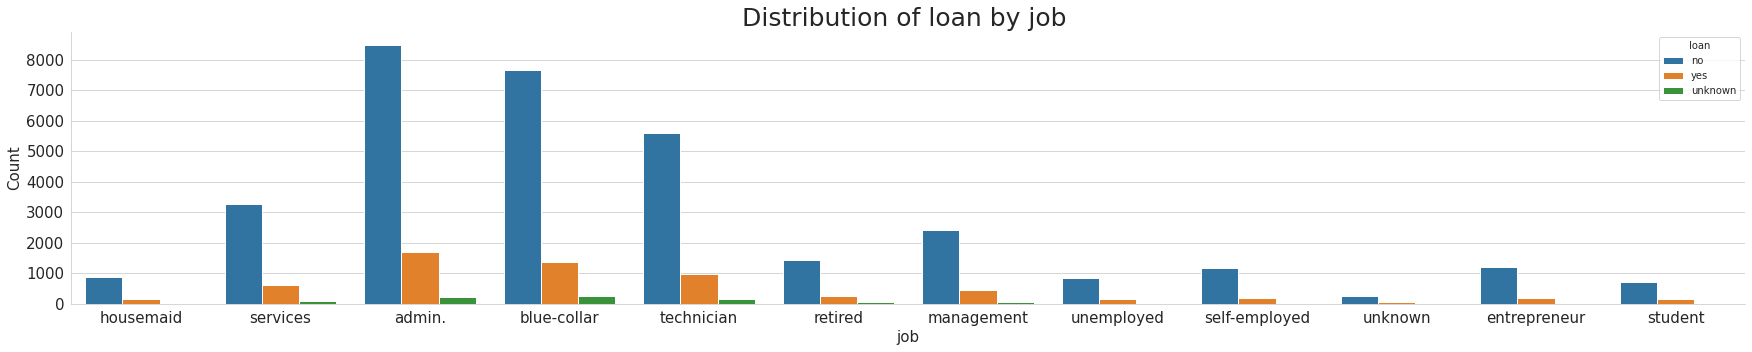

In [206]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 5)
sns.countplot(x = 'job', hue = 'loan', data = df1)
ax.set_xlabel('job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Distribution of loan by job ', fontsize=25)
ax.tick_params(labelsize=15)
sns.despine()

Observamos que en general la mayoria de los entrevistados no tuvo un préstamo, y eso no depende de su puesto laboral.

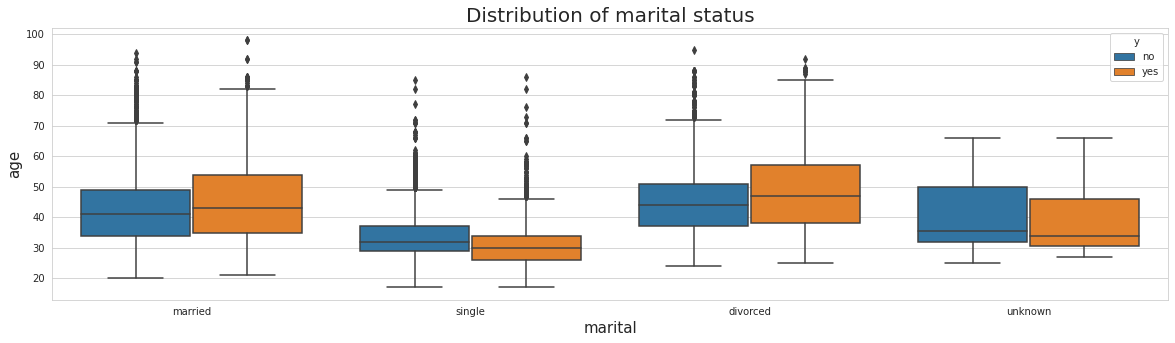

In [207]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
ax.set_xlabel('marital', fontsize=15)
ax.set_ylabel('Age',fontsize=15)
ax.set_title('Distribution of marital status', fontsize=20)
sns.boxplot(x='marital', y='age', hue='y', data=df1, saturation=0.75, width=0.8, dodge=True,)

En la distribución de los estados civiles, vemos que las edades outliers más altas en general estan en las personas casadas y divorciadas en su mayoría. Podemos observar que la mayoria de los casados y divorciados contrata el producto, mientras que en las categorías soltero y 'no determinado' la variable y esta mas pareja

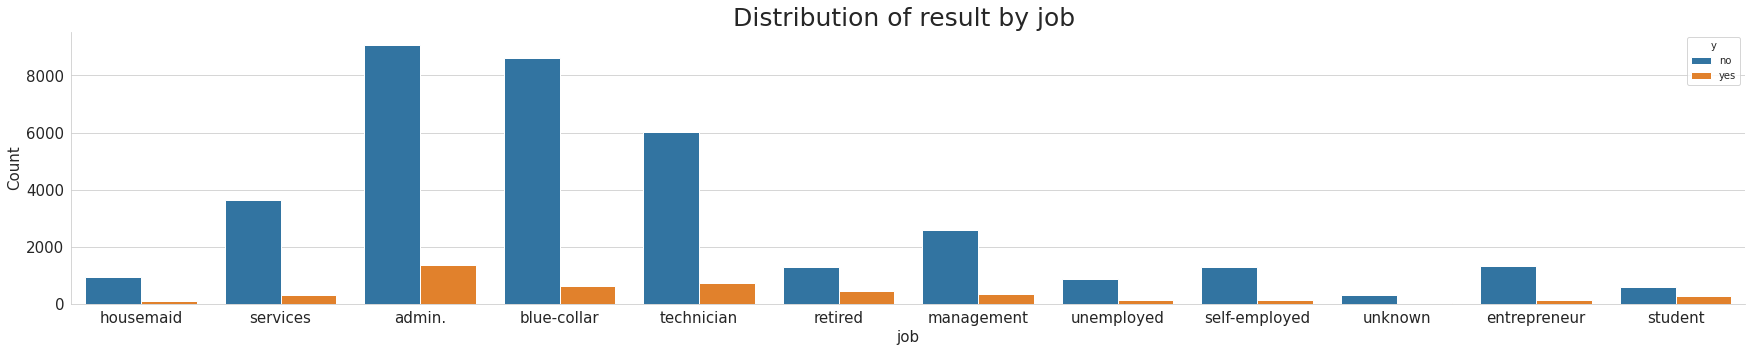

In [208]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 5)
sns.countplot(x = 'job', hue = 'y', data = df1)
ax.set_xlabel('job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Distribution of result by job ', fontsize=25)
ax.tick_params(labelsize=15)
sns.despine()

Analizando la distribución vemos que el "no" gana en todas las categorías, sin importar el puesto laboral

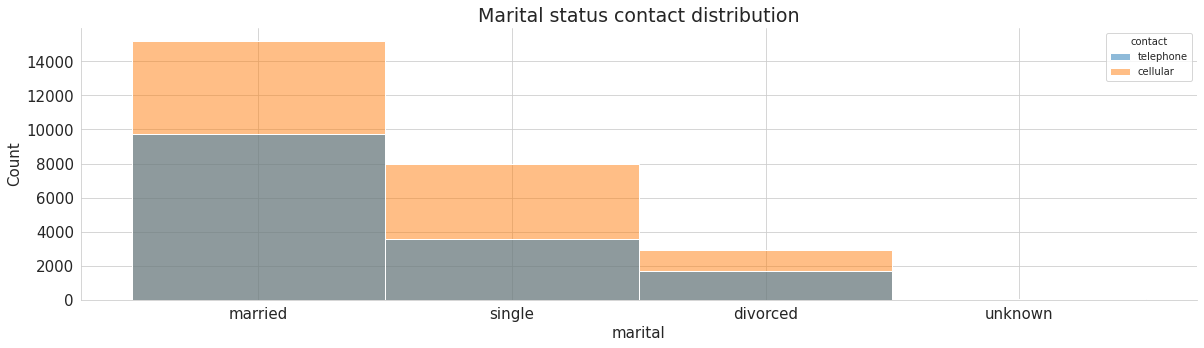

In [209]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.histplot(x = 'marital', hue = 'contact', data = df1)
ax.set_xlabel('marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital status contact distribution', fontsize=19)
ax.tick_params(labelsize=15)
sns.despine()

Como lo demuestra el gráfico, la mayoria de los entrevistados casados y divorciados son entrevistados por teléfono, mientras que los solteros son más asiduos a responder por celular.

Text(0.5, 1.0, 'Marital status age distribution')

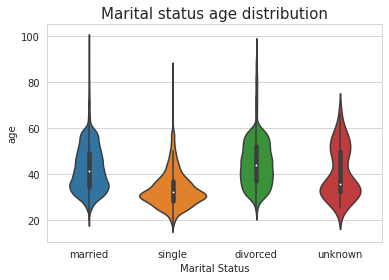

In [210]:
ax = sns.violinplot(x="marital", y="age", data=df1, split=False)
ax.set_xlabel("Marital Status")
ax.set_title('Marital status age distribution', fontsize=15)

Se detalla que los jovenes componen mayormente el grupo de solteros, mientras que casados y divorciados tienen una media mas alta, como era previsible

###MULTIVARIADO

Vemos que las categorías con mayor correlación son emp.var.rate con euribor3m, nr.employed y cons.price.id. Es decir que las variables socio-economicas influyen mucho en el modelo

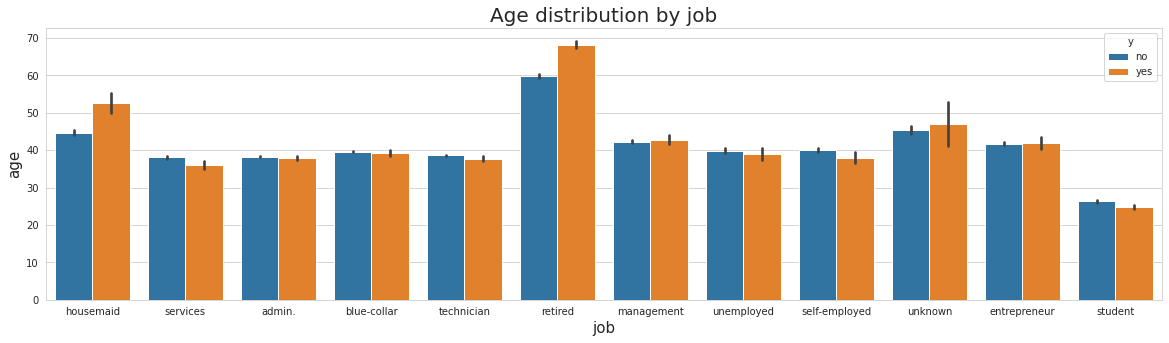

In [211]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
ax.set_xlabel('job', fontsize=15)
ax.set_ylabel('age', fontsize=15)
ax.set_title("Age distribution by job", fontsize=20)
sns.barplot(x='job',y='age', hue='y',data=df1)

plt.show()

La distribución de la edad con respecto al tipo de trabajo muestra que las personas de mayor edad estan retiradas, miientras que las otras categorias se encuentran realmente parejas: servicios, adminitrativos, trabajadores de cuello azul, técnicos. La contratación del producto es pareja en todos los puestos laborales. El mayor porcentaje de "si" esta en el grupo de retirados y en el de empleados domésticos.

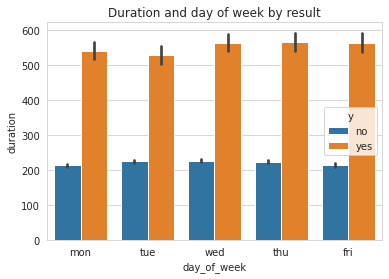

In [212]:
graf1 = sns.barplot(x='day_of_week',y='duration', hue='y',data=df1)
graf1.set_title("Duration and day of week by result")
plt.show()

Sin importar el dia de la semana, la mayoría de "Y" es abrumadora y tiene mayor duración

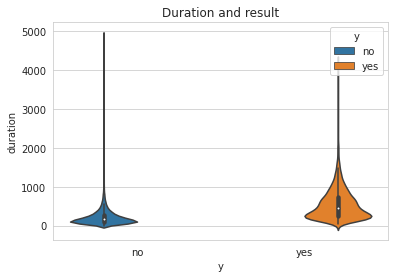

In [213]:
graf3 = sns.violinplot(x='y',y='duration', hue='y',data=df1)
graf3.set_title("Duration and result")
plt.show()

En el violinplot se detalla que en las suscripciones de depósitos a plazo se realizan en las llamadas más largas.

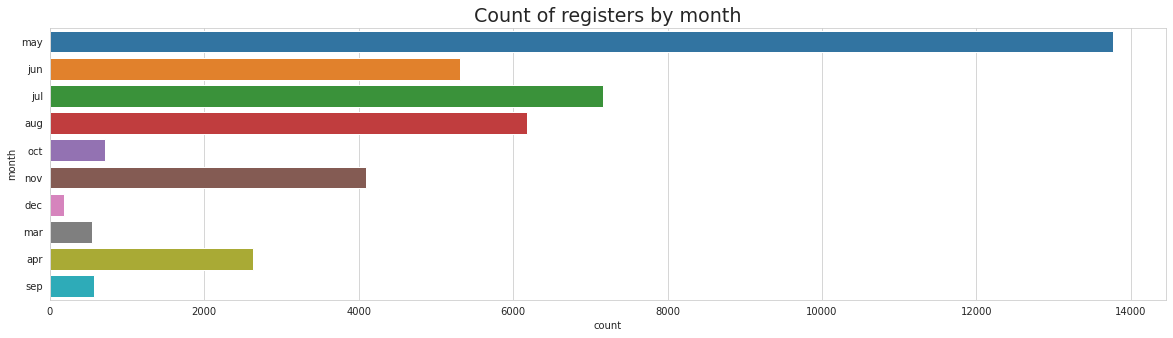

In [214]:
plt.figure(figsize=(20,5))
graf4 = sns.countplot(y='month',data=df1)
graf4.set_title('Count of registers by month', fontsize=19)
plt.show()

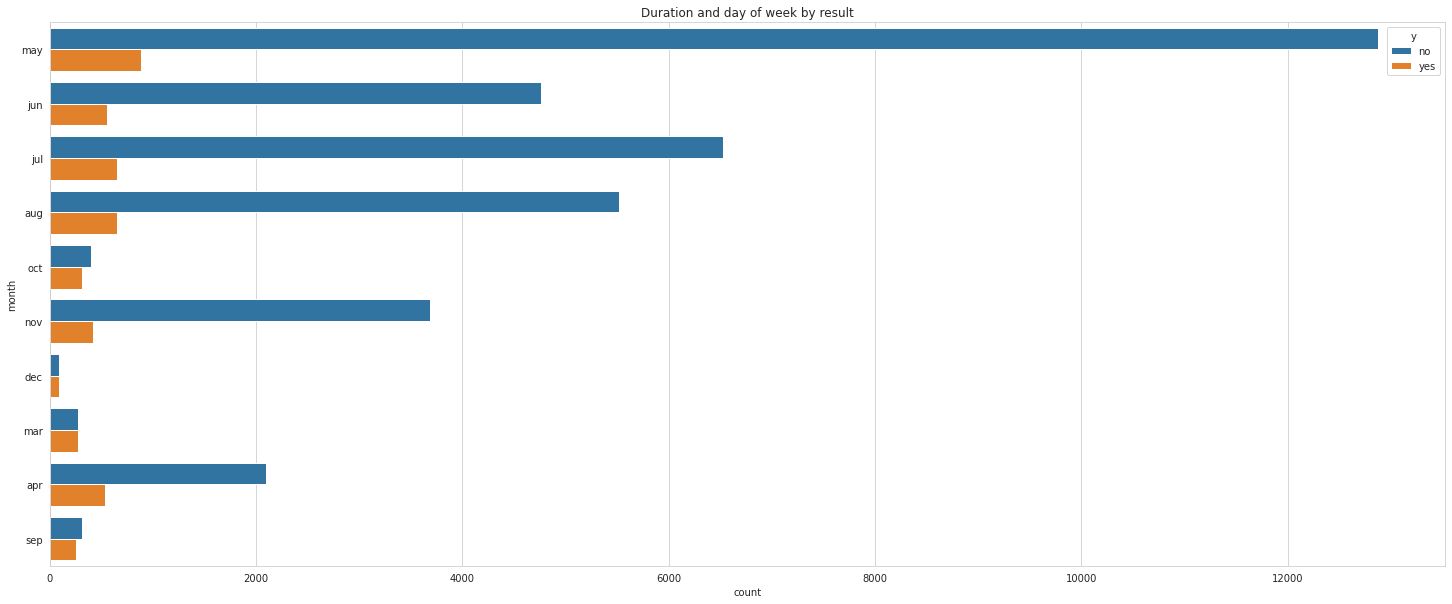

In [215]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
graf5 = sns.countplot(y='month',hue='y',data=df1)
graf5.set_title("Duration and day of week by result")
plt.show()

Se observa claramente que la mayoría de los registros se desarrolla en el mes de mayo, y que los valores de y son muy parecidos en diciembre y marzo.

# FEATURE SELECTION

Antes de iniciar con la etapa de modelado veamos si podemos reducir la dimensionalidad de nuestro dataset seleccionando los features mas relevantes..

In [216]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [217]:
bank = pd.get_dummies(data=df1, drop_first=True)

In [218]:
bank.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0


## PCA

Vemos que tenemos 54 columnas en nuestro datasets aplicando dummy. Busquemos reducir la cantidad de features. Con esto perdemos un poco de informacion, pero buscamos ver mejor las relaciones y entender los patrones y comportamientos..

Vamos a utilizar la tenica de PCA (Principal Component Analysis)

Con el PCA buscamos proyectar los puntos de varias dimensiones para proyectarlos en un plano de menor dimension. Lo que hacemos es crear variables sinteticas de los features ya existentes.

In [219]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import statsmodels.api as sm

Porcentaje de varianza explicada por cada componente
[1.00295433e-01 4.51274415e-02 4.36139275e-02 4.07607482e-02
 3.79417306e-02 3.19324404e-02 3.07563617e-02 3.04128513e-02
 2.76148024e-02 2.68092756e-02 2.45313674e-02 2.33396455e-02
 2.32066119e-02 2.26893393e-02 2.19833226e-02 2.15477935e-02
 2.04867390e-02 1.98698919e-02 1.96485452e-02 1.94783845e-02
 1.92314714e-02 1.90768281e-02 1.88927064e-02 1.88205003e-02
 1.86117839e-02 1.84797172e-02 1.83908703e-02 1.83083866e-02
 1.81738758e-02 1.73643067e-02 1.70169896e-02 1.69308066e-02
 1.65666571e-02 1.53236151e-02 1.51069359e-02 1.40212167e-02
 1.34718047e-02 1.30983338e-02 1.04447216e-02 9.04594943e-03
 8.54725864e-03 7.04784178e-03 4.42903251e-03 4.32161744e-03
 4.29974308e-03 3.70769780e-03 3.60953874e-03 1.98717239e-03
 1.67872957e-03 1.06611560e-03 7.71123640e-04 7.18924905e-05
 3.81063453e-05 4.58973721e-33]


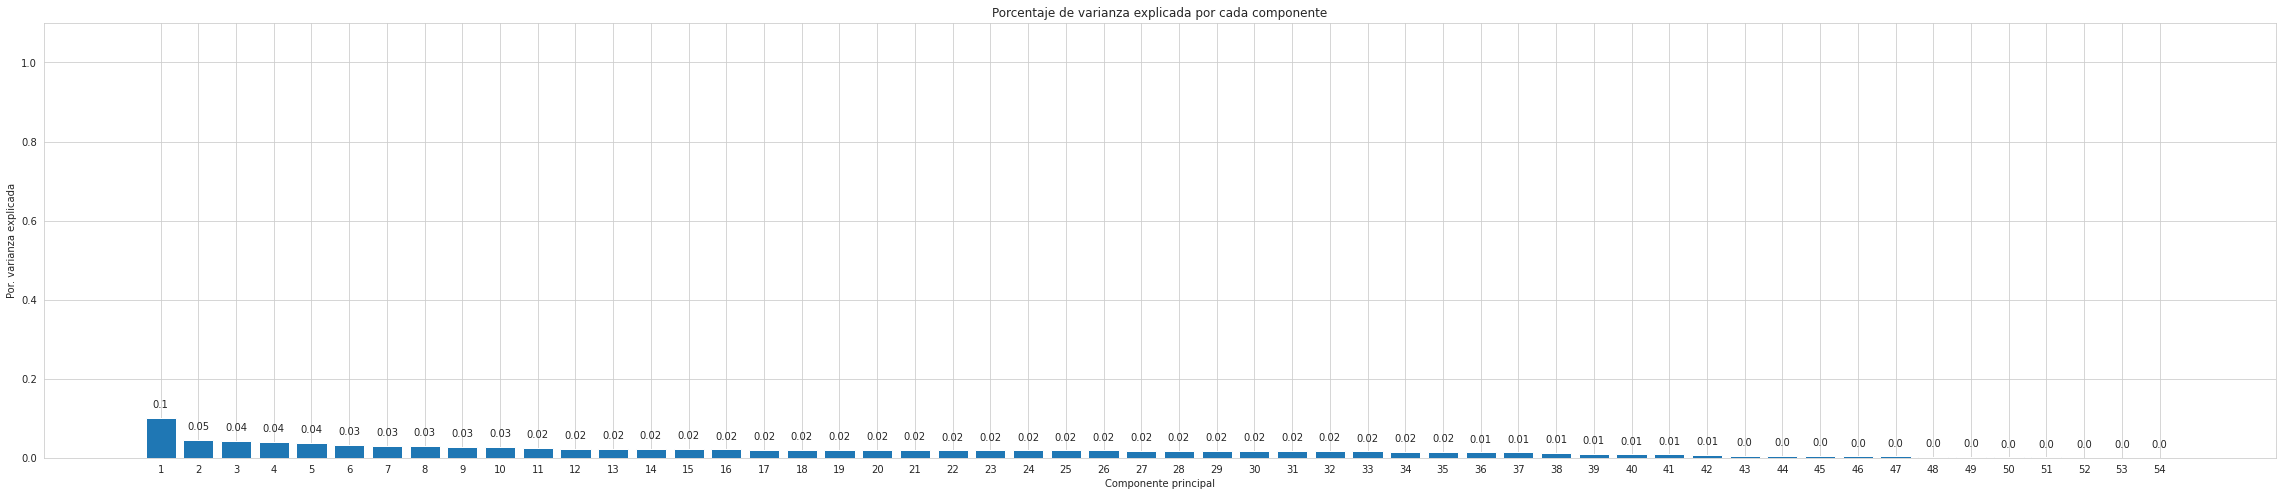

In [220]:
datos = bank
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
# Porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca.explained_variance_ratio_)
import seaborn as sns;sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(40, 8))
ax.bar(x= np.arange(modelo_pca.n_components_) + 1,height = modelo_pca.explained_variance_ratio_)
for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1);ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

Preprocesado y modelado del modelo PCA

In [221]:
0.1 + 0.05 + 0.04*(3) + 0.03*(5)

0.42000000000000004

Con las primeras 8 variables sinteticas explicamos el 42% de la variabilidad.

In [222]:
0.02*(25)

0.5

Con las 25 variables sinteticas siguientes explicamos otro 50% de variabilidad. (hasta aqui tenemos explicado el 92% de variabilidad)

Esto quiere decir que las restantes 19 varaibles sinteticas explican el 8% de variabildiad, por lo que las desestimamos..

Sirve este metodo para nuestra problematica actual? Veamos otro metodo para hacer feature selection..

## WRAPPER METHOD

Con el metodo Wrapper buscamos seleccionar los mejores features para nuestro modelo. Este metodo va evaluando las posibles combinaciones de features que mejor performan. 

In [223]:
#pip install mlxtend

In [224]:
#pip install joblib

In [225]:
from sklearn.model_selection import train_test_split #pip install -U scikit-learn
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
import sys
sys.modules['sklearn.externals.joblib'] = joblib
import joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import StandardScaler

Volvamos a repasar en que consta nuestro dataset (al que habiamos eliminado los duplicados) df1

In [226]:
df1.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [227]:
df.shape

(41188, 21)

In [228]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41172 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41172 non-null  int64  
 1   job             41172 non-null  object 
 2   marital         41172 non-null  object 
 3   education       41172 non-null  object 
 4   default         41172 non-null  object 
 5   housing         41172 non-null  object 
 6   loan            41172 non-null  object 
 7   contact         41172 non-null  object 
 8   month           41172 non-null  object 
 9   day_of_week     41172 non-null  object 
 10  duration        41172 non-null  int64  
 11  campaign        41172 non-null  int64  
 12  pdays           41172 non-null  int64  
 13  previous        41172 non-null  int64  
 14  poutcome        41172 non-null  object 
 15  emp.var.rate    41172 non-null  float64
 16  cons.price.idx  41172 non-null  float64
 17  cons.conf.idx   41172 non-null 

Dado que muchos de los features son del tipo objeto vamos a transformarlos aplicando Label Encoder para que podamos utilizarlos en esta seleccion..

In [229]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = df1.columns.tolist()
for column in cols:
  if df1[column].dtype == 'object':
    df1[column] = le.fit_transform(df1[column])

In [230]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41172 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41172 non-null  int64  
 1   job             41172 non-null  int64  
 2   marital         41172 non-null  int64  
 3   education       41172 non-null  int64  
 4   default         41172 non-null  int64  
 5   housing         41172 non-null  int64  
 6   loan            41172 non-null  int64  
 7   contact         41172 non-null  int64  
 8   month           41172 non-null  int64  
 9   day_of_week     41172 non-null  int64  
 10  duration        41172 non-null  int64  
 11  campaign        41172 non-null  int64  
 12  pdays           41172 non-null  int64  
 13  previous        41172 non-null  int64  
 14  poutcome        41172 non-null  int64  
 15  emp.var.rate    41172 non-null  float64
 16  cons.price.idx  41172 non-null  float64
 17  cons.conf.idx   41172 non-null 

Ahora vemos que nuestros features son del tipo numerico 

In [231]:
#Xd = pd.get_dummies(data=(df1.iloc[:,:-1]), drop_first=True)
#yd = pd.get_dummies(data=(df1.iloc[:,-1]), drop_first=True)  

Podriamos haber aplicado Dumies para transformar tambien, pero esto va a provocar que la cantidad de features de nuestro dataset sea aun mayor.

Separamos la matrix de disenio y nuestra variable target:

In [232]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [233]:
X_train, X_test, y_train, y_test = train_test_split(Xd,y,test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((32937, 20), (8235, 20))

Importamos algunas librerias para trabajar con este metodo..

In [154]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import RandomForestClassifier as rfc
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [136]:
feature_names=tuple(X.columns)
feature_names

('age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed')

Dentro del metodo Wrapper vamos a utilizar diferentes tipos de iteraciones:
- SFS Sequential Forward Selection

###  SFS - Sequential Forward Selection

Mientras otros algoritmos consideran todas las combinaciones posibles de los predictores, SFS considera mucho menos modelos. Comienza con un modelo sin predictores y luego agrega predictores uno a la vez hasta que todos los predictores esten en el modelo. En particular, la variable que es agregada al modelo es aquella que aporte una mejora en el ajuste del modelo.

In [132]:
sfsl = SFS(LGR(max_iter=3000),
           k_features='best',
           forward=True, #activamos el Forward selection
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=0)

In [133]:
sfsl = sfsl.fit(X,y,custom_feature_names=feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.5s finished

[2022-06-17 21:19:10] Features: 1/20 -- score: 0.8931312542504615[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    7.2s finished

[2022-06-17 21:19:17] Features: 2/20 -- score: 0.905882638686486[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.6s finished

[2022-06-17 21:19:22] Features: 3/20 -- score: 0.907485669872729[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

Vamos a ver que fue tomando..

In [138]:
sfsl.subsets_

{1: {'avg_score': 0.8931312542504615,
  'cv_scores': array([0.89313125]),
  'feature_idx': (10,),
  'feature_names': ('duration',)},
 2: {'avg_score': 0.905882638686486,
  'cv_scores': array([0.90588264]),
  'feature_idx': (10, 12),
  'feature_names': ('duration', 'pdays')},
 3: {'avg_score': 0.907485669872729,
  'cv_scores': array([0.90748567]),
  'feature_idx': (10, 12, 18),
  'feature_names': ('duration', 'pdays', 'euribor3m')},
 4: {'avg_score': 0.90799572525017,
  'cv_scores': array([0.90799573]),
  'feature_idx': (4, 10, 12, 18),
  'feature_names': ('default', 'duration', 'pdays', 'euribor3m')},
 5: {'avg_score': 0.908505780627611,
  'cv_scores': array([0.90850578]),
  'feature_idx': (4, 10, 12, 17, 18),
  'feature_names': ('default',
   'duration',
   'pdays',
   'cons.conf.idx',
   'euribor3m')},
 6: {'avg_score': 0.908675799086758,
  'cv_scores': array([0.9086758]),
  'feature_idx': (4, 10, 11, 12, 17, 18),
  'feature_names': ('default',
   'duration',
   'campaign',
   'pdays

Vamos a ver las metricas en formato de diccionario..

In [137]:
sfsl.get_metric_dict()

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{1: {'avg_score': 0.8931312542504615,
  'ci_bound': nan,
  'cv_scores': array([0.89313125]),
  'feature_idx': (10,),
  'feature_names': ('duration',),
  'std_dev': 0.0,
  'std_err': nan},
 2: {'avg_score': 0.905882638686486,
  'ci_bound': nan,
  'cv_scores': array([0.90588264]),
  'feature_idx': (10, 12),
  'feature_names': ('duration', 'pdays'),
  'std_dev': 0.0,
  'std_err': nan},
 3: {'avg_score': 0.907485669872729,
  'ci_bound': nan,
  'cv_scores': array([0.90748567]),
  'feature_idx': (10, 12, 18),
  'feature_names': ('duration', 'pdays', 'euribor3m'),
  'std_dev': 0.0,
  'std_err': nan},
 4: {'avg_score': 0.90799572525017,
  'ci_bound': nan,
  'cv_scores': array([0.90799573]),
  'feature_idx': (4, 10, 12, 18),
  'feature_names': ('default', 'duration', 'pdays', 'euribor3m'),
  'std_dev': 0.0,
  'std_err': nan},
 5: {'avg_score': 0.908505780627611,
  'ci_bound': nan,
  'cv_scores': array([0.90850578]),
  'feature_idx': (4, 10, 12, 17, 18),
  'feature_names': ('default',
   'durati

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


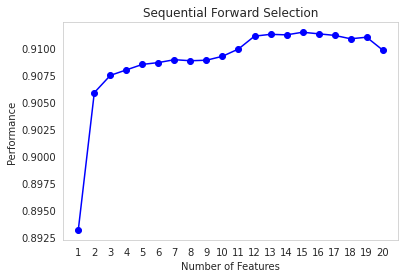

In [146]:

figl = plot_sfs(sfsl.get_metric_dict(confidence_interval=0.95),kind='std_err')

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

Vamos a ver los indices de los mejores features directamente con el atributo k_feature_idx

Tambien podemos ver secuencialmente como la seleccion de features va modificando nuestro score

In [149]:
df = pd.DataFrame.from_dict(sfsl.get_metric_dict()).T
df[["feature_idx","avg_score"]]

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,avg_score
1,"(10,)",0.893131
2,"(10, 12)",0.905883
3,"(10, 12, 18)",0.907486
4,"(4, 10, 12, 18)",0.907996
5,"(4, 10, 12, 17, 18)",0.908506
6,"(4, 10, 11, 12, 17, 18)",0.908676
7,"(4, 10, 11, 12, 15, 17, 18)",0.908943
8,"(4, 5, 10, 11, 12, 15, 17, 18)",0.908846
9,"(4, 5, 10, 11, 12, 15, 16, 17, 18)",0.908894
10,"(4, 5, 10, 11, 12, 15, 16, 17, 18, 19)",0.909259


Vemos que en la lista, seleccinando 15 features es lo que mejor performa..

Particularmente, los siguientes features...

In [148]:
sfsl.k_feature_names_, sfsl.k_feature_idx_

(('age',
  'education',
  'default',
  'housing',
  'contact',
  'day_of_week',
  'duration',
  'campaign',
  'pdays',
  'poutcome',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed'),
 (0, 3, 4, 5, 7, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19))

#MODELS

Dado que nuestro problema es de classificacion veremos tres algoritmos para elegir al mejor. Para ello no solo tomaremos una metrica para su comparacion, sino que buscaremos obtener varias metricas para elegir el mejor modelo. 

Modelos elegidos:
Decision Tree
Random Forest

Metricas elegidas:

- **Accuracy (exactitud)**

El accuracy es una medida verdaderamente intuitiva, puesto que se limita a calcular la relación entre las predicciones correctas de un modelo, versus el total de predicciones que llevó a cabo.

¿Cuándo resulta útil solo observar el accuracy? Principalmente cuando el costo de un falso positivo es el mismo que el de un falso negativo. Esta medida puede ser engañosa si tiene un número desigual de observaciones en cada clase o si tiene más de dos clases.

Hay que tener cuidado de que la métrica accuracy (exactitud) no funciona bien cuando las clases están desbalanceadas.

Para calcular la precisión usaremos la siguiente fórmula:

\begin{equation}
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
\end{equation}


- **Matriz de confusion**

Veremos tambien la matriz de confusion, que nos permitira ver los tipos de errores que esta cometiendo nuestro modelo. 

A modo de ejemplo podemos ver en la primer imagen que un hipotético caso de marketing. En este ejemplo, contactamos a 100 clientes y 80 de ellos nos dicen que no están interesados y 20 de ellos que sí. Nuestro modelo (en el ejemplo) no es muy bueno, aunque dependiendo de qué métrica usemos podría parecer que es mejor de lo que es.

Valores de la clasificación binaria:

0: no está interesado
1: sí está interesado


![pic](https://www.iartificial.net/wp-content/uploads/2019/11/Matriz-Confusion-Ejemplo.png)

* - TP: True Positive
* - TN: True Negative
* - FP: False Positive
* - FN: False Negative



Con los valores obtenidos de esta matriz tambien podemos sacar otras metricas como..

- **Precision**

Con la métrica de precisión podemos medir la calidad del modelo de machine learning en tareas de clasificación. En el ejemplo, se refiere a que la precisión es la respuesta a la pregunta ¿qué porcentaje de los clientes que contactemos estarán interesados?

Para calcular la precisión usaremos la siguiente fórmula:

\begin{equation}
precision = \frac{TP}{TP+FP}
\end{equation}


- **F1 score**

El valor F1 se utiliza para combinar las medidas de precision y recall en un sólo valor. Esto es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones.

F1 se calcula haciendo la media armónica entre la precisión y la exhaustividad:

\begin{equation}
F1 = 2* \frac{Precission * Recall}{Precission + Recall}
\end{equation}

siendo:

\begin{equation}
Recall = \frac{TP}{TP+FN}
\end{equation}

Vamos a repasar los features seleccionados segun nuestra etapa de Feature selection:

(('age',
  'education',
  'default',
  'housing',
  'contact',
  'day_of_week',
  'duration',
  'campaign',
  'pdays',
  'poutcome',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed'),
 (0, 3, 4, 5, 7, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19))

In [ ]:
y = pd.get_dummies(df1['y'], columns = ['y'], prefix = ['y'], drop_first = True)
df1.head()

In [258]:
#Si importamos todos los features quedaria asi:
#df_model = df_model[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
#                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
#                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]

In [259]:
df_model = pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1, join='inner')
df_model = df_model[['age', 'education', 'default', 'housing', 'contact', 'day_of_week', 'duration', 'campaign', 'pdays', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
df_model.head()

,age,education,default,housing,contact,day_of_week,duration,campaign,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,1,2,2,1,1,3,1,999,1,1.1,93.994,-36.4,4.857,5191.0
1,3,2,3,2,1,1,2,1,999,1,1.1,93.994,-36.4,4.857,5191.0
2,2,2,2,1,1,1,3,1,999,1,1.1,93.994,-36.4,4.857,5191.0
3,2,3,2,2,1,1,2,1,999,1,1.1,93.994,-36.4,4.857,5191.0
4,3,2,2,2,1,1,3,1,999,1,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
#bank.var()

In [ ]:
#bank.corr()

In [ ]:
#ig,ax = plt.subplots()
#fig.set_size_inches(60,30)
#ax = sns.heatmap(bank.corr(), annot = True, fmt='.1g', 
#                 vmin=-1, vmax=1, center= 0)
#plt.title("Correlation", y=1)
#plt.xlabel("Features")
#plt.ylabel("Features")

Text(158.09375, 0.5, 'Features')

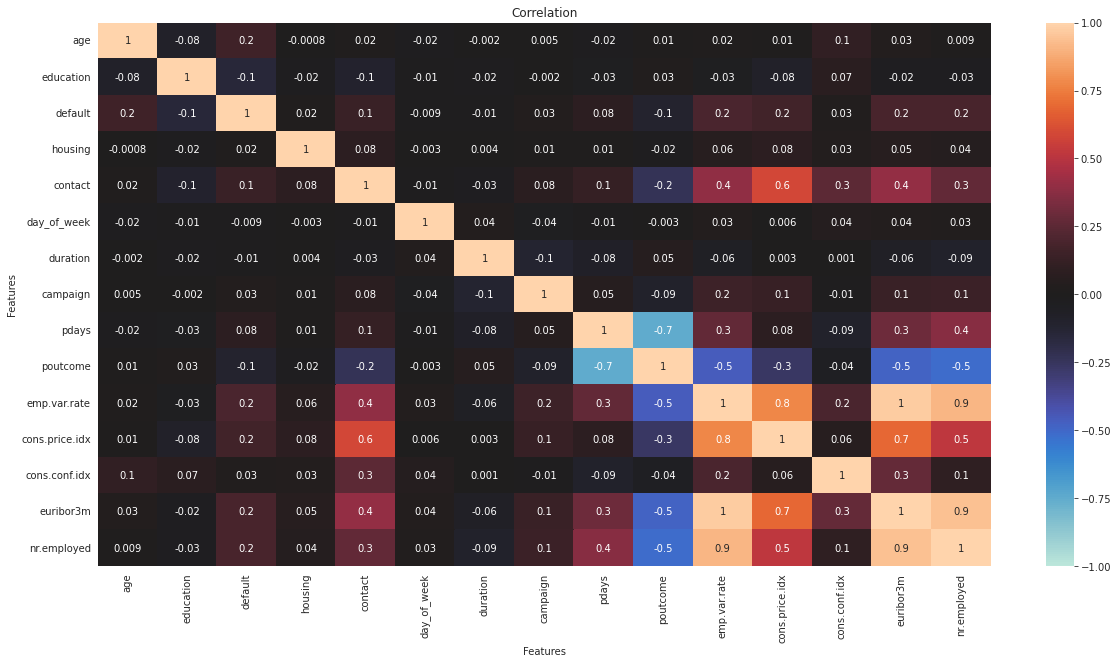

In [260]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
ax = sns.heatmap(df_model.corr(), annot = True, fmt='.1g', 
                 vmin=-1, vmax=1, center= 0)
plt.title("Correlation", y=1)
plt.xlabel("Features")
plt.ylabel("Features")

##SVM

Nuestro primer algoritmo, el SVM o Support Vector Machine, se utiliza principalmente para resolver problemas de clasificación. Los vectores de soporte no son más que las coordenadas de cada elemento de datos. Support Vector Machine es una frontera que diferencia dos clases usando hiperplanos.

In [262]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values,
                                                    y, test_size=0.3,random_state=42) # 70% training and 30% test

#'age','month_apr', 'month_aug', 'month_dec',	'month_jul',	'month_jun',	'month_mar',	'month_may',	'month_nov',	'month_oct',	'month_sep','duration','cons.price.idx','campaign'

In [263]:
X_test

array([[ 3.7000e+01,  9.0000e+00,  1.0000e+00, ..., -4.6200e+01,
         1.3440e+00,  5.0991e+03],
       [ 3.2000e+01,  0.0000e+00,  2.0000e+00, ..., -4.2000e+01,
         4.0210e+00,  5.1958e+03],
       [ 2.2000e+01,  9.0000e+00,  2.0000e+00, ..., -4.6200e+01,
         1.2500e+00,  5.0991e+03],
       ...,
       [ 2.9000e+01,  0.0000e+00,  1.0000e+00, ..., -4.6200e+01,
         1.3270e+00,  5.0991e+03],
       [ 4.0000e+01,  1.0000e+00,  1.0000e+00, ..., -4.2700e+01,
         4.9600e+00,  5.2281e+03],
       [ 5.1000e+01,  0.0000e+00,  1.0000e+00, ..., -4.2000e+01,
         4.1910e+00,  5.1958e+03]])

In [264]:
from sklearn import svm
#Svm Classifier
clf = svm.SVC(kernel='rbf',C=0.1) # Kernel Lineal (Existen diversos tipos de kernel linear, rbf, poly,sigmoid )
#Entrenar el modelo
clf.fit(X_train, y_train)
#Obtener las predicciones
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [265]:
from sklearn import metrics
#Accuracy
ASVM = print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
ASVM

Accuracy: 0.8980731865284974


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


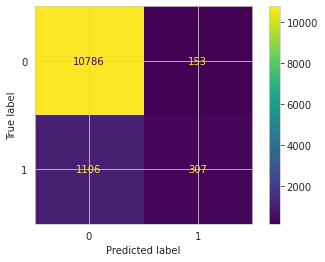

In [266]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)

In [267]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94     10939
           1       0.67      0.22      0.33      1413

    accuracy                           0.90     12352
   macro avg       0.79      0.60      0.64     12352
weighted avg       0.88      0.90      0.87     12352



##DECISION TREE

Nuestro segundo modelo, es el Arbol de decision. Este modelo tiene un enfoque de arriba hacia abajo con la estructura del diagrama de flujo que maneja datos de alta dimensión.

Los resultados se predicen en función de la variable de entrada dada. Árbol de decisión compuesto por los siguientes elementos: una raíz, muchos nodos, ramas, hojas. El nodo raíz realiza la partición en función del valor de atributo de la clase, el nodo interno toma un atributo para una clasificación adicional, las ramas toman una regla de decisión para dividir los nodos en nodos hoja, por último, los nodos hoja nos dan el resultado final.

La complejidad temporal del árbol de decisión depende del número de registros, atributos de los datos de entrenamiento. Si el árbol de decisión es demasiado largo, es difícil obtener los resultados deseados.

In [268]:
from sklearn.model_selection import train_test_split 

#Tomamos 30% del dataset para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [269]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2, random_state = 42)

Entrenamos al modelo

In [270]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [271]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [272]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.895558639833449
% de aciertos sobre el set de evaluación: 0.8909488341968912


A simple vista los resultados son demasiado buenos

Veamos la importancia de cada variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


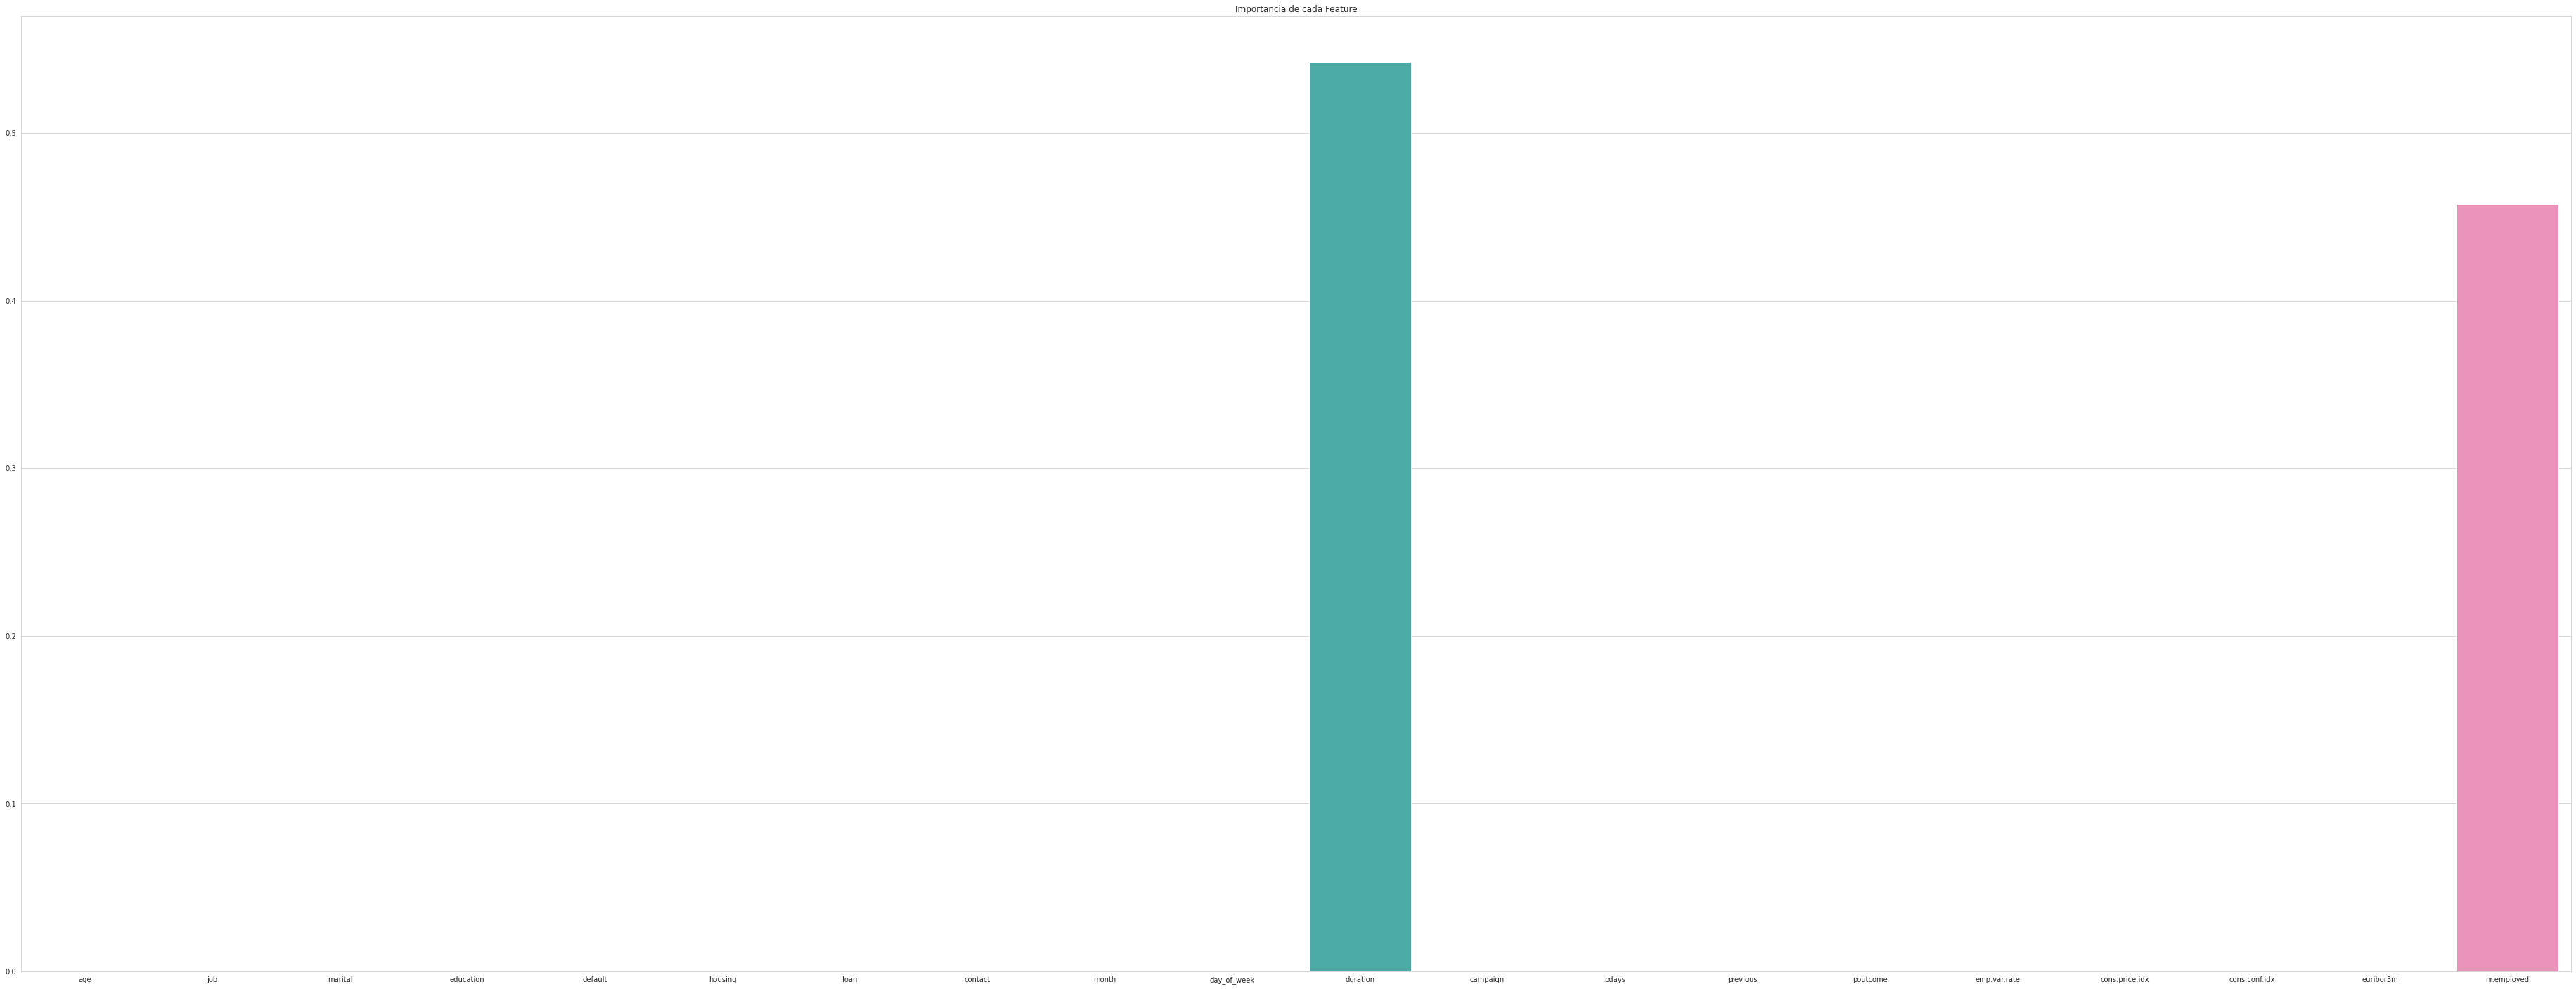

In [273]:
plt.figure(figsize=(65,25))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

Las variables "duration" y "nr.employee" son las que mas influyen en el DECISION TREE 

- **Duración**: duración del último contacto, en segundos (numérico). Nota importante: este atributo afecta en gran medida el objetivo de salida (por ejemplo, si la duración = 0, entonces y = 'no'). Sin embargo, la duración no se conoce antes de que se realice una llamada. Además, después del final de la llamada y es evidente que se sabe. Por lo tanto, esta entrada solo debe incluirse con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista.

- **Nr.ocupados**: número de empleados - indicador trimestral (numérico)

Como vemos en la descripcion de la feature duracion este no seria un modelo realista

Creamos la matriz de confusion

In [274]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_test_pred)

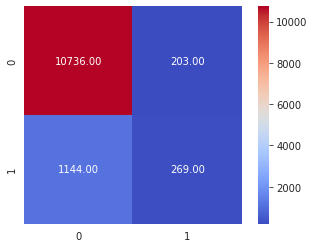

In [275]:
sns.heatmap(matriz, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 10},
            cmap= 'coolwarm') 

In [276]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     10939
           1       0.57      0.19      0.29      1413

    accuracy                           0.89     12352
   macro avg       0.74      0.59      0.61     12352
weighted avg       0.87      0.89      0.87     12352



##RANDOM FOREST

Nuestro ultimo algoritmo es el Random Forest. Este es un conjunto de árboles de decisión combinados. Lo que lo diferencia del arbol de decision es que distintos árboles ven distintas porciones de los datos. Ningún árbol ve todos los datos de entrenamiento. Esto hace que cada árbol se entrene con distintas muestras de datos para un mismo problema. De esta forma, al combinar sus resultados, unos errores se compensan con otros y tenemos una predicción que generaliza mejor.

In [277]:
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Definimos train y test

In [278]:
(X_train, X_test,y_train, y_test) = train_test_split(X, y, stratify=y,
                                    test_size=0.30,
                                    random_state=11)

In [279]:
model_RF = RandomForestClassifier(random_state=32, n_estimators=100,
                               class_weight="balanced", max_features="log2")
model_RF.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       random_state=32)

In [280]:
y_test_pred_ranFor = model_RF.predict(X_test) #Prediccion en Test

In [281]:
from sklearn.metrics import accuracy_score  

test_accuracy = accuracy_score(y_test, y_test_pred_ranFor)

Calculamos accuracy

In [282]:
test_accuracy = accuracy_score(y_test, y_test_pred_ranFor)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.912645725388601


Creamos la matriz de confusion

In [283]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_test_pred_ranFor)

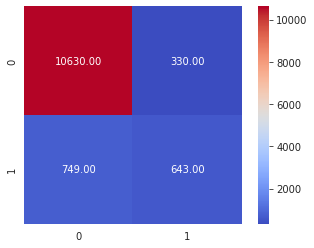

In [284]:
sns.heatmap(matriz, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 10},
            cmap= 'coolwarm') 

In [285]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_ranFor))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10960
           1       0.66      0.46      0.54      1392

    accuracy                           0.91     12352
   macro avg       0.80      0.72      0.75     12352
weighted avg       0.90      0.91      0.91     12352



#BOOSTING MODELS

##XGBOOST

####EJECUCION

In [286]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)

In [288]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=15,seed=42,max_depth=5, learning_rate=0.01)

In [289]:
clf_xgb.fit(X_train,y_train) 

XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=15, seed=42)

In [290]:
y_train_pred_xgboost = clf_xgb.predict(X_train)
y_test_pred_xgboost = clf_xgb.predict(X_test)

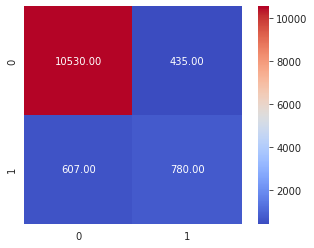

In [291]:
matriz = confusion_matrix(y_test, y_test_pred_xgboost)
sns.heatmap(matriz, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 10},
            cmap= 'coolwarm') 

In [292]:
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, y_test_pred_xgboost)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9156411917098446


####ANALISIS DE RESULTADOS - XGBOOST

In [293]:
print(classification_report(y_test, y_test_pred_xgboost))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10965
           1       0.64      0.56      0.60      1387

    accuracy                           0.92     12352
   macro avg       0.79      0.76      0.78     12352
weighted avg       0.91      0.92      0.91     12352



##LIGHTGBM

####EJECUCION

In [294]:
import lightgbm as lgb #pip install lightgbm
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [295]:
y_pred_LGBM = clf.predict(X_test)

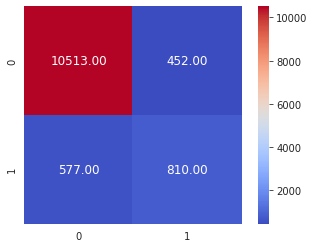

In [296]:
matriz = confusion_matrix(y_test, y_pred_LGBM)
sns.heatmap(matriz, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 12},
            cmap= 'coolwarm') 

####ANALISIS DE RESULTADOS - LIGHTGBM

In [297]:
print(classification_report(y_test, y_pred_LGBM))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10965
           1       0.64      0.58      0.61      1387

    accuracy                           0.92     12352
   macro avg       0.79      0.77      0.78     12352
weighted avg       0.91      0.92      0.91     12352



##ADABOOST

####EJECUCION

In [298]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 80 kB/s 


In [299]:
from catboost import CatBoostClassifier
modelo = CatBoostClassifier()
modelo.fit(X_train, y_train)

Learning rate set to 0.043274
0:	learn: 0.6158942	total: 58.1ms	remaining: 58.1s
1:	learn: 0.5565013	total: 72.3ms	remaining: 36.1s
2:	learn: 0.5158410	total: 81.3ms	remaining: 27s
3:	learn: 0.4749671	total: 90.5ms	remaining: 22.5s
4:	learn: 0.4351679	total: 100ms	remaining: 20s
5:	learn: 0.4063815	total: 110ms	remaining: 18.1s
6:	learn: 0.3828939	total: 119ms	remaining: 16.8s
7:	learn: 0.3558884	total: 128ms	remaining: 15.9s
8:	learn: 0.3364994	total: 138ms	remaining: 15.2s
9:	learn: 0.3188397	total: 147ms	remaining: 14.6s
10:	learn: 0.3059288	total: 157ms	remaining: 14.1s
11:	learn: 0.2924609	total: 166ms	remaining: 13.7s
12:	learn: 0.2807973	total: 175ms	remaining: 13.3s
13:	learn: 0.2695235	total: 185ms	remaining: 13s
14:	learn: 0.2637723	total: 195ms	remaining: 12.8s
15:	learn: 0.2583508	total: 207ms	remaining: 12.7s
16:	learn: 0.2514712	total: 216ms	remaining: 12.5s
17:	learn: 0.2453800	total: 225ms	remaining: 12.3s
18:	learn: 0.2407003	total: 237ms	remaining: 12.2s
19:	learn: 0.

In [300]:
# Predicción del modelo
expected_y  = y_test
y_test_catboost = modelo.predict(X_test)

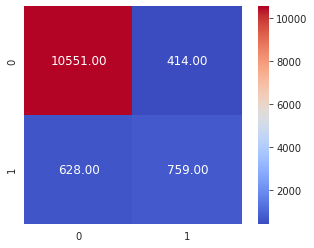

In [301]:
matriz = confusion_matrix(y_test, y_test_catboost)
sns.heatmap(matriz, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 12},
            cmap= 'coolwarm') 

In [302]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("R2_Score:")
print(r2_score(expected_y, y_test_catboost))
print("")
print("Mean_Squared_Error:")
print(mean_squared_error(expected_y, y_test_catboost))

R2_Score:
0.15370864430344844

Mean_Squared_Error:
0.08435880829015543


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


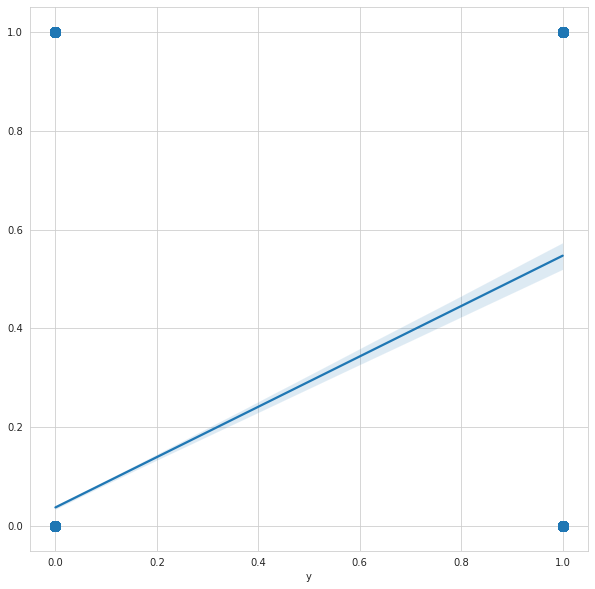

In [303]:
plt.figure(figsize=(10,10))
sns.regplot(expected_y, y_test_catboost, fit_reg=True, scatter_kws={"s": 100})

####ANALISIS DE RESULTADOS - CATBOOST

In [304]:
print(classification_report(y_test, y_test_catboost))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.65      0.55      0.59      1387

    accuracy                           0.92     12352
   macro avg       0.80      0.75      0.77     12352
weighted avg       0.91      0.92      0.91     12352



#MEJORA DE MODELOS

In [305]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score


## Mejora del modelo Decision Tree Classifier

In [306]:
param_grid = { 'criterion':['gini', 'entropy'],
                'splitter':['best','random']
}
gS_dTree = GridSearchCV(tree, param_grid=param_grid, cv=5)

In [307]:
gS_dTree.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']})

In [308]:
print("Mejores parametros: "+str(gS_dTree.best_params_))
print("Mejor Score: "+str(gS_dTree.best_score_)+'\n')

Mejores parametros: {'criterion': 'gini', 'splitter': 'best'}
Mejor Score: 0.9047883414295628



In [309]:
scores_DTree = pd.DataFrame(gS_dTree.cv_results_)
scores_DTree

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026696,0.002766,0.004593,0.001988,gini,best,"{'criterion': 'gini', 'splitter': 'best'}",0.905274,0.902325,0.908397,0.900416,0.907529,0.904788,0.003032,1
1,0.014520,0.002798,0.003408,0.000828,gini,random,"{'criterion': 'gini', 'splitter': 'random'}",0.897641,0.898855,0.898855,0.895212,0.898161,0.897745,0.001347,3
2,0.026742,0.001475,0.003444,0.000133,entropy,best,"{'criterion': 'entropy', 'splitter': 'best'}",0.905274,0.902325,0.908397,0.899722,0.907529,0.904650,0.003238,2
3,0.013154,0.000210,0.002981,0.000117,entropy,random,"{'criterion': 'entropy', 'splitter': 'random'}",0.887752,0.887058,0.888099,0.886711,0.887578,0.887439,0.000496,4


In [310]:
prediction_dtree = gS_dTree.predict(X_test)

In [311]:
matriz_gridsearch_dt = confusion_matrix(y_test, prediction_dtree)
print('Matriz de Confusión de datos de Test:')
print(matriz_gridsearch_dt)

Matriz de Confusión de datos de Test:
[[10543   422]
 [  817   570]]


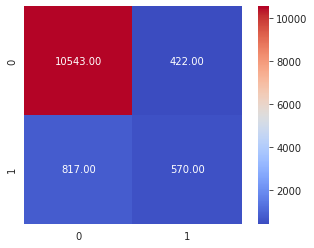

In [312]:
sns.heatmap(matriz_gridsearch_dt, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 10},
            cmap= 'coolwarm')

In [313]:
print('Exactitud Decision Tree Classifier:', accuracy_score(y_test, y_test_pred))
print('Exactitud Decision Tree Classifier + GridSearch:', accuracy_score(y_test, prediction_dtree))

Exactitud Decision Tree Classifier: 0.8572700777202072
Exactitud Decision Tree Classifier + GridSearch: 0.8996923575129534


In [314]:
from sklearn.metrics import precision_score

print('Precisión para Decision tree classifier: ', precision_score(y_test, y_test_pred, average='macro'))
print('Precisión para Decision tree classifier + GridSearch: ', precision_score(y_test, prediction_dtree, average='macro'))

Precisión para Decision tree classifier:  0.49449223877189974
Precisión para Decision tree classifier + GridSearch:  0.7513388800545207


## Mejora del modelo Random Forest

In [315]:
param_grid = { 'criterion':['gini', 'entropy'],
                'max_features':['auto','sqrt', 'log2'],
                'class_weight':['balanced', 'balanced_subsample']
}
gS_RF = GridSearchCV(model_RF, param_grid=param_grid, cv=5)

In [316]:
gS_RF.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_features='log2',
                                              random_state=32),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [317]:
print("Mejores parametros: "+str(gS_RF.best_params_))
print("Mejor Score: "+str(gS_RF.best_score_)+'\n')

Mejores parametros: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto'}
Mejor Score: 0.9145038167938931



In [318]:
scores_RT = pd.DataFrame(gS_RF.cv_results_)
scores_RT

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.652918,1.102714,0.225410,0.072524,balanced,gini,auto,"{'class_weight': 'balanced', 'criterion': 'gin...",0.915337,0.910999,0.917245,0.910479,0.911346,0.913081,0.002703,4
1,4.109406,0.322405,0.189694,0.030974,balanced,gini,sqrt,"{'class_weight': 'balanced', 'criterion': 'gin...",0.915337,0.910999,0.917245,0.910479,0.911346,0.913081,0.002703,4
2,2.295936,0.600592,0.131807,0.039057,balanced,gini,log2,"{'class_weight': 'balanced', 'criterion': 'gin...",0.915337,0.910999,0.917245,0.910479,0.911346,0.913081,0.002703,4
3,2.295026,0.032448,0.114511,0.004619,balanced,entropy,auto,"{'class_weight': 'balanced', 'criterion': 'ent...",0.915337,0.914816,0.917592,0.913081,0.911693,0.914504,0.002012,1
4,2.301034,0.032110,0.112869,0.002870,balanced,entropy,sqrt,"{'class_weight': 'balanced', 'criterion': 'ent...",0.915337,0.914816,0.917592,0.913081,0.911693,0.914504,0.002012,1
5,2.314139,0.009033,0.112390,0.002914,balanced,entropy,log2,"{'class_weight': 'balanced', 'criterion': 'ent...",0.915337,0.914816,0.917592,0.913081,0.911693,0.914504,0.002012,1
6,2.389284,0.004375,0.115296,0.003374,balanced_subsample,gini,auto,"{'class_weight': 'balanced_subsample', 'criter...",0.913775,0.912387,0.916031,0.911520,0.909958,0.912734,0.002062,7
7,2.398048,0.022289,0.112763,0.001367,balanced_subsample,gini,sqrt,"{'class_weight': 'balanced_subsample', 'criter...",0.913775,0.912387,0.916031,0.911520,0.909958,0.912734,0.002062,7
8,2.401363,0.023619,0.113032,0.001803,balanced_subsample,gini,log2,"{'class_weight': 'balanced_subsample', 'criter...",0.913775,0.912387,0.916031,0.911520,0.909958,0.912734,0.002062,7
9,3.242109,0.618554,0.114111,0.003896,balanced_subsample,entropy,auto,"{'class_weight': 'balanced_subsample', 'criter...",0.913775,0.912387,0.915163,0.910826,0.910305,0.912491,0.001808,10


In [319]:
prediction_rf = gS_RF.predict(X_test)

In [320]:
matriz_gridsearch_rf = confusion_matrix(y_test, prediction_rf)
print('Matriz de Confusión de datos de Test:')
print(matriz_gridsearch_rf)

Matriz de Confusión de datos de Test:
[[10611   354]
 [  722   665]]


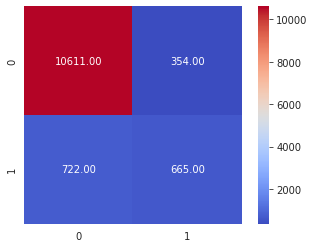

In [321]:
sns.heatmap(matriz_gridsearch_rf, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 10},
            cmap= 'coolwarm')

In [322]:
print('Exactitud Random Forest Classifier:', accuracy_score(y_test, y_test_pred_ranFor))
print('Exactitud Random Forest Classifier + GridSearch:', accuracy_score(y_test, prediction_rf))

Exactitud Random Forest Classifier: 0.8261010362694301
Exactitud Random Forest Classifier + GridSearch: 0.9128886010362695


In [323]:
print('Precisión para Random Forest Classifier: ', precision_score(y_test, y_test_pred_ranFor, average='macro'))
print('Precisión para Random Forest Classifier + GridSearch: ', precision_score(y_test, prediction_rf, average='macro'))

Precisión para Random Forest Classifier:  0.4981828103860928
Precisión para Random Forest Classifier + GridSearch:  0.7944464163510437
